STUDENT NAME: Peter Bisimbeko

STUDENT NO : SEP21/COMP/903U

Machine Learning Exam

In [ ]:
Question Four
Use Support Vector Machines (SVM) Classifier to model the data set classifying and evaluation of classes of iris by:
(Hint: Submit the screen shot of your codes where necessary).

a)	Generating the SVM figure (8 marks)

b)	Evaluate the SVM classifier using Jaccard index, F1- scores, and log loss metrics  (12 marks)

c)	Explain the results shown in the SVM algorithm. (4 marks)



a)	Generating the SVM figure (8 marks)


In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import sklearn.svm as svm
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("iris.csv")
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.tail()

,sepalLength,sepalWidth,petalLength,petalWidth,class
95,7.2,3.0,5.8,1.6,virginica
96,7.4,2.8,6.1,1.9,virginica
97,7.9,3.8,6.4,2.0,virginica
98,6.4,2.8,5.6,2.2,virginica
99,6.3,2.8,5.1,1.5,virginica


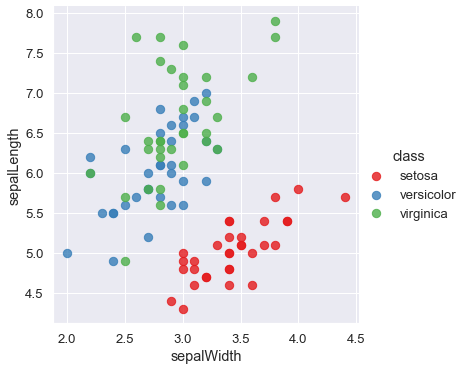

In [8]:
sns.lmplot(y='sepalLength', x='sepalWidth', data=df, hue='class',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [9]:
# format or pre-process the data

df.dtypes

sepalLength    float64
sepalWidth     float64
petalLength    float64
petalWidth     float64
class           object
dtype: object

In [10]:
feature_df = df[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']]
X = np.asarray(feature_df)
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [14]:
df['class'] = df['class'].astype('str')
y = np.asarray(df['class'])
y [0:100]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       '

In [36]:
#SPlit|Test|Train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (80, 4) (80,)
Test set: (20, 4) (20,)


In [37]:
# Running the SVM Model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [38]:
# Prediction

yhat = clf.predict(X_test)
yhat [0:5]

array(['setosa', 'setosa', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

In [39]:
# Accuracy Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [40]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion matrix, without normalization
[[9 0 0]
 [0 8 0]
 [0 0 3]]


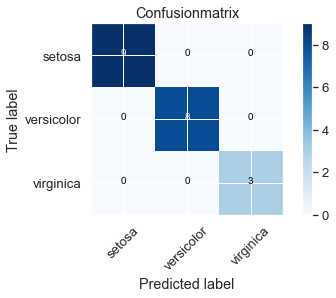

In [41]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=['setosa','versicolor','virginica'])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))

# Plotting the non-normalized contigency table or confusion matrix 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['setosa','versicolor','virginica'],normalize= False, title='Confusionmatrix')

b)	Evaluate the SVM classifier using Jaccard index, F1- scores, and log loss metrics  (12 Marks

In [42]:
# Evaluation usig the f1_score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

1.0

c)	Explain the results shown in the SVM algorithm. (4 marks)

# Conclusion
Support Vector machines Model has been able to classify the Iris data set with oevrall F1 score of 0.84, translating the 84% accuracy. This happens when the value of random_state parameter is set to 100. However, setting the randomness to a lower value of 4, the Model's prediction increases to 100% with f1_score of 1.0. Hence SVM is recommended for this classification work.